# EMagPy Quickstart
In this tutorial you will learn how to import and processes EMI data with the emagpy API (Application Progamming Interface). The API is a set of classes, function and methods that can be called from the command line or in script and jupyter notebook. EMagPy also has a graphical user interface (GUI) that make use of the API behind the scene. The advantage of the API is that is allows more automated task to be performed and user in interactive environment such as this jupyter notebook.

## Import EMagPy
You can either download emagpy from source from https://gitlab.com/hkex/emagpy or install it using `pip install emagpy`. Then you can import the main class from the emagpy module: `Problem`.

In [1]:
import os
import numpy as np
import sys
import pandas as pd
sys.path.insert(0,'../src/') # this add the emagpy/src directory to the PATH
from emagpy import Problem # import the main Problem class from emagpy

## Data import
After importing the module we will import the file `coverCrop.csv` from the test folder.

In [2]:
testdir = '../src/examples/cover-crop/'

k = Problem() # this create the main object
k.createSurvey(testdir + 'coverCrop.csv') # this import the data

Removing 1 NaN from survey


The data are usually imported from a .csv file with the headers being the coil configuration. Below is an example of the `coverCrop.csv` file.

In [3]:
import pandas as pd
df = pd.read_csv(testdir + 'coverCrop.csv')
df.head() # see how the header are formatted

,x,y,VCP0.32,VCP0.71,VCP1.18,VCP0.32_inph,VCP0.71_inph,VCP1.18_inph,HCP0.32,HCP0.71,HCP1.18,HCP0.32_inph,HCP0.71_inph,HCP1.18_inph
0,0,0,34.090222,34.67,38.32,1.79,1.90,2.13,33.53,39.77,45.22,2.13,2.27,2.68
1,1,0,35.350111,36.69,40.16,1.79,1.87,2.13,39.72,43.81,46.76,2.20,2.30,2.72
2,2,0,36.680000,35.79,39.21,1.81,1.87,2.14,36.10,40.63,45.16,2.14,2.29,2.71
3,3,0,41.960556,34.26,37.43,1.76,1.30,2.12,35.64,39.47,41.97,2.18,2.22,2.63
4,4,0,29.250444,28.91,33.51,1.79,1.92,2.19,32.46,36.36,40.58,2.23,2.24,2.69


## Data visualization
You can use the `Problem.show()` function to visualize the data as a line graph. Additionnaly if spatial coordinates are in the csv file (columns x an y). A map can also be produced using `Problem.showMap()`.

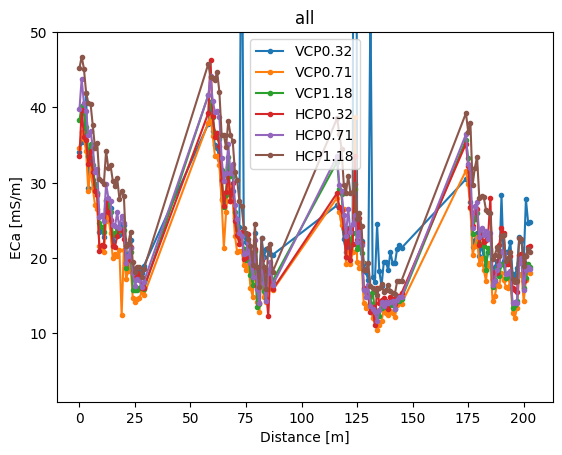

In [4]:
k.show(vmax=50)

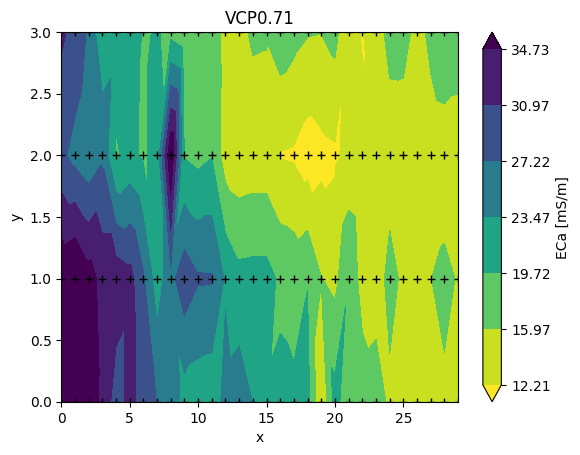

In [5]:
k.showMap(coil='VCP0.71', contour=True, pts=True)

## Data inversion
To invert the data we must first define a starting model with a given number of layers and a starting conductivity in mS/m.

In [6]:
k.setInit(depths0=[0.5, 1], # specify the BOTTOM of each layer (the last layer is infinite)
          conds0=[20, 20, 20],
          fixedConds=[False, False, False])# conductivity in mS/m

Then there are different forward model available:
- `CS` : Cumulative Senstivity (following McNeil 1980). Default and fastest forward model.
- `CSgn` : Which is a fast Gauss-Newton inversion based on CS. Choosing this forward model will automatically make use of the `Problem.ìnvertGN()` method and ignore the arguments passed to `invert()` except `alpha`.
- `FSlin` : Full Solution based on Maxwell's equations using the LIN (Low Induction Number) approximation to convert the quadrature (Q) to ECa
- `FSeq` : Full Solution based on Maxwell's equations that doesn't rely on the LIN but rather compute an apparent value based on optimization (see Andrade et al., 2016).
- `Q` : Full Solution based on Maxwell's equations where the quadrature (Q) is directly minimize without being converted to ECa. This forward model is prefered for high EC (> 100 mS/m).

To solve the optimization problem, two types of solvers are available:
- `L-BFGS-B` (default), `TNC`, `CG`, `Nelder-Mead` minimizes an objective function using `scipy.optimize.minimize()`.
- `ROPE`, `SCEUA`, `DREAM` are MCMC-based method provided by the `spotpy` package that works well when the depth of each layer is not fixed.

The inverted section can be seen using `showResults()` and `showSlice()` if spatial data are available. The quality of the inversion can be assessed using `showMisfit()` and `showOne2one()`.

120/120 inverted

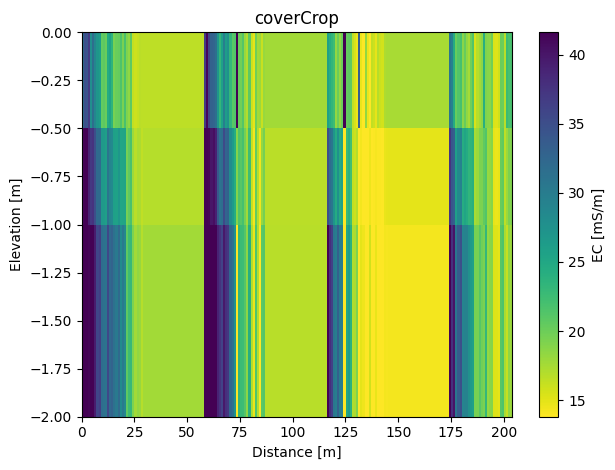

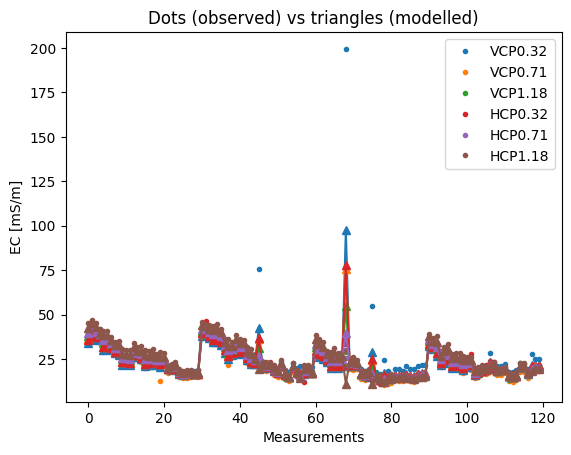

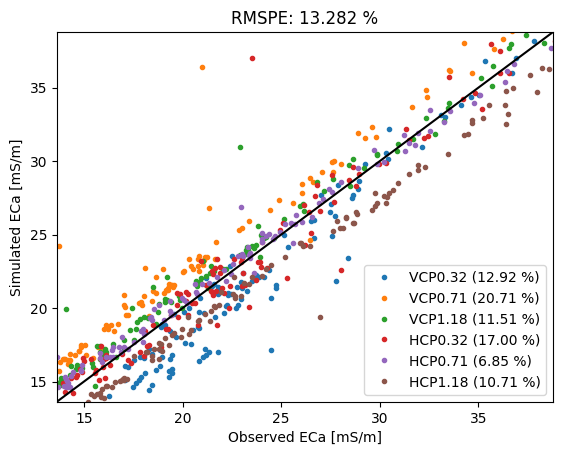

In [7]:
# default minimize() based inversion with CS and L-BFGS-B solver
k.invert()
k.showResults()
k.showMisfit()
k.showOne2one()

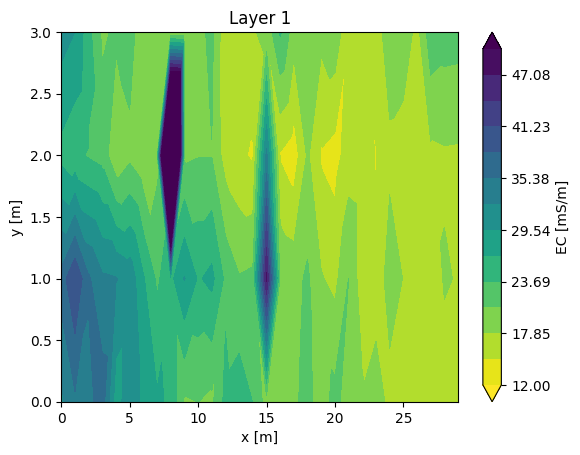

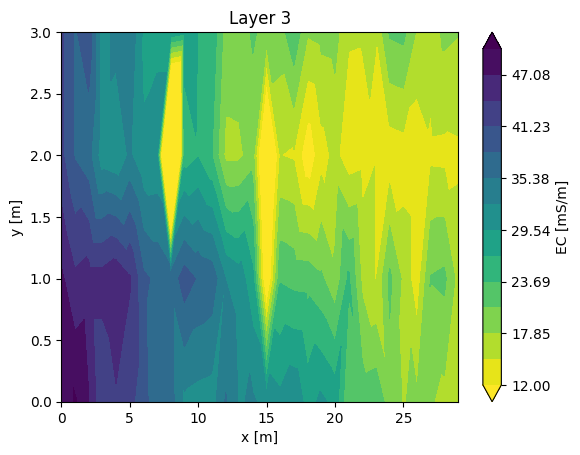

In [8]:
k.showSlice(islice=0, contour=True, vmin=12, vmax=50)
k.showSlice(islice=2, contour=True, vmin=12, vmax=50)

In [9]:
help(k.showSlice) # how to access the help for each method

Help on method showSlice in module emagpy.Problem:

showSlice(index=0, islice=0, contour=False, vmin=None, vmax=None, cmap='viridis_r', ax=None, pts=False) method of emagpy.Problem.Problem instance
    Show depth slice of EC (if islice > 0) and depth (if islice < 0).
    
    Parameters
    ----------
    index : int, optional
        Survey index. Default is first.
    islice : int, optional
        Layer index (if islice > 0). Default is first layer. If islice < 0,
        the depths will be display instead (e.g. islice = -1 will display
        the depth of the bottom of the first layer).
    contour : bool, optional
        If `True` then there will be contouring.
    vmin : float, optional
        Minimum value for colorscale.
    vmax : float, optional
        Maximum value for colorscale.
    cmap : str, optional
        Name of colormap. Default is viridis_r.
    ax : Matplotlib.Axes, optional
        If specified, the graph will be plotted against it.
    pts : boolean, option